In [1]:
import pandas as pd

prot_df = pd.read_csv('data/train_proteins.csv')
clin_df = pd.read_csv('data/train_clinical_data.csv')
clin_df = clin_df.rename(columns={'upd23b_clinical_state_on_medication': 'on_meds'})

clin_df['on_meds'] = clin_df['on_meds'].fillna(0)
clin_df['on_meds'] = clin_df['on_meds'].replace({'Off': 0, 'On': 1})


In [2]:
pivoted = prot_df.pivot(index="visit_id", columns="UniProt", values="NPX")

import numpy as np

# Normalize each column separately
for col in pivoted.columns:
    col_data = pivoted[col].dropna()
    mean = col_data.mean()
    std = col_data.std(ddof=1)
    pivoted[col] = (pivoted[col] - mean) / std
    
# Alternatively, you can replace NaN values with the mean of each column:
# normalized = pivoted.fillna(pivoted.mean())

# Replace original NaN values in pivoted with -1
norm_prot_df = pivoted.fillna(0)


In [3]:
norm_prot_df

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,-0.900600,-0.461720,0.000000,0.000000,-1.470450,-0.444028,-0.593125,-1.667750,-0.354558,-0.281485,...,0.000000,-1.391765,-0.731008,0.000000,-0.987070,-0.509656,-0.155142,-0.665670,0.000000,-0.177409
10053_12,-0.417843,-0.320609,0.000000,0.000000,0.000000,0.000000,0.975488,-1.668428,-0.392920,-0.642241,...,0.000000,-1.127541,0.000000,0.000000,-0.551562,-0.571055,-0.164081,0.000000,-1.782304,0.445860
10053_18,0.566004,-0.016030,-1.810210,-0.329170,0.000000,-0.553583,0.004869,-1.612750,-0.344776,0.316984,...,0.273013,0.170261,-0.032686,0.000000,0.189582,0.150555,-0.383094,-1.363066,0.000000,0.763531
10138_12,0.340410,-0.070349,-1.619825,-0.013312,0.672284,2.636155,0.414596,0.176453,0.105514,-1.527830,...,2.069495,0.485349,1.809923,-0.127163,0.110313,-0.006194,1.412260,0.966993,0.262118,-1.238675
10138_24,0.128482,0.046548,-2.055741,-1.197716,1.594137,-0.297542,0.343887,0.073175,0.568006,-1.027346,...,0.000000,0.660812,2.720630,0.401529,-0.790307,-0.522044,-0.402934,-1.084349,-0.806772,-1.376184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,-0.588663,-0.470336,-0.211620,0.000000,-0.103930,2.887669,-0.668856,-0.202889,0.735489,-0.111533,...,0.000000,-0.523964,0.000000,-1.833403,-1.295444,-1.067865,1.693948,-0.813447,1.403941,-1.199522
942_12,-1.733737,-0.637608,-0.760188,-1.485313,0.127695,-1.122628,-0.540278,-0.609492,0.207333,-0.773126,...,-1.757402,-0.105180,-0.738786,-0.397118,-1.120484,0.041569,0.481254,-0.085353,-0.350174,-0.806277
942_24,0.000000,-0.672121,-0.342884,-0.463266,-0.138815,-1.328256,-0.156427,-0.686454,-0.122440,-0.796141,...,-0.750672,-0.305691,-0.660126,-0.850905,-0.938037,0.263195,0.270085,-0.087719,-0.112542,-0.587157


In [4]:
# Calculate mean and standard deviation of updrs_1 through updrs_4
updrs_mean = clin_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].mean()
updrs_std = clin_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].std()


# Normalize updrs_1 through updrs_4 and round to 3 sig figs
clin_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']] = ((clin_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']] - updrs_mean) / updrs_std).round(3)
norm_clin_df = clin_df.fillna(0)




In [5]:
norm_clin_df

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,on_meds
0,55_0,55,0,0.523,-0.118,-0.295,0.000,0
1,55_3,55,3,0.523,0.041,0.372,0.000,0
2,55_6,55,6,0.161,0.515,0.972,0.000,0
3,55_9,55,9,0.161,0.357,0.705,-0.616,1
4,55_12,55,12,0.523,0.515,1.439,-0.616,1
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,-0.020,-0.118,-0.428,-0.616,0
2611,65043_54,65043,54,-0.563,0.199,-0.561,-0.285,0
2612,65043_60,65043,60,-0.201,-0.118,-0.228,-0.285,0
2613,65043_72,65043,72,-0.744,0.357,-0.361,-0.285,0


In [6]:
class Measurement:
    def __init__(self, visit_id):
        self.id = visit_id
        self.patient, self.month = visit_id.split('_')

        self.proteins = []
        self.peptides = {}
        self.updrs1 = None
        self.updrs2 = None
        self.updrs3 = None
        self.updrs4 = None
        self.on_meds = None

    def add_protein_data(self, protein, NPX):
        self.peptides[protein] = NPX

class Patient:
    def __init__(self, id):
        self.id = id
        self.measurements = []

    def __repr__(self):
        return f"Patient(id={self.id})"
    
    def add_measurement(self, measurement):
        self.measurements.append(measurement)

    def __len__(self):
        return len(self.measurements)


In [7]:
patients = {}
# Instantiate a Patient object for each unique patient_id
for id in prot_df.patient_id.unique():
    patients[id] = Patient(id)

In [9]:
# Convert clin_df to a dictionary with visit_id as the key
clin_dict = clin_df.set_index('visit_id').to_dict('index')

# Group the prot_df by visit_id
grouped_prot_df = prot_df.groupby('visit_id')

measurements = {}
# Iterate through the grouped dataframe
for visit_id, group in grouped_prot_df:
    measurement = Measurement(visit_id)

    # Add protein and NPX data to the corresponding Measurement object
    for _, row in group.iterrows():
        protein = row['UniProt']
        NPX = row['NPX']
        measurement.add_protein_data(protein, NPX)

    # Get UPDRS scores and medication status for the visit_id from the clin_dict
    if visit_id in clin_dict:
        measurement.updrs1 = clin_dict[visit_id]['updrs_1']
        measurement.updrs2 = clin_dict[visit_id]['updrs_2']
        measurement.updrs3 = clin_dict[visit_id]['updrs_3']
        measurement.updrs4 = clin_dict[visit_id]['updrs_4']
        measurement.on_meds = clin_dict[visit_id]['on_meds']

    # Store the Measurement object in the measurements dictionary
    measurements[visit_id] = measurement


In [10]:
# Iterate through the measurements dictionary
for visit_id, measurement in measurements.items():
    # Get the patient_id from the Measurement object
    patient_id = int(measurement.patient)

    # Add the Measurement object to the corresponding Patient object
    patients[patient_id].add_measurement(measurement)

# Print the measurements of the Patient with id 55
for measurement in patients[55].measurements:
    print(measurement.id)

55_0
55_12
55_36
55_6


In [13]:
for patient_id, patient in patients.items():
    num_measurements = len(patient)
    print(f"Patient {patient_id} -- {num_measurements} measurements")

Patient 55 -- 4 measurements
Patient 1517 -- 4 measurements
Patient 1923 -- 3 measurements
Patient 2660 -- 5 measurements
Patient 3636 -- 3 measurements
Patient 3863 -- 5 measurements
Patient 4161 -- 6 measurements
Patient 4172 -- 7 measurements
Patient 5027 -- 4 measurements
Patient 5178 -- 7 measurements
Patient 5645 -- 6 measurements
Patient 5742 -- 3 measurements
Patient 6054 -- 3 measurements
Patient 6211 -- 7 measurements
Patient 7051 -- 4 measurements
Patient 7117 -- 4 measurements
Patient 7568 -- 4 measurements
Patient 7832 -- 5 measurements
Patient 8699 -- 3 measurements
Patient 10053 -- 3 measurements
Patient 10174 -- 5 measurements
Patient 10541 -- 4 measurements
Patient 10715 -- 4 measurements
Patient 10718 -- 5 measurements
Patient 11459 -- 5 measurements
Patient 11686 -- 6 measurements
Patient 11928 -- 6 measurements
Patient 12516 -- 4 measurements
Patient 12636 -- 6 measurements
Patient 12703 -- 6 measurements
Patient 12755 -- 4 measurements
Patient 13368 -- 4 measuremen

In [20]:
num_patients = len(patients)
num_measurements = len(measurements)
print(f"Number of Measurement objects: {num_measurements}")
print(f"Number of Patient objects: {num_patients}")
print(f"Mean per patient: {round(num_measurements/num_patients,2)}")


Number of Measurement objects: 1113
Number of Patient objects: 248
Mean per patient: 4.49


In [71]:
def plot_patient_measurements(patient):
    fig, ax = plt.subplots()
    ax.set_xlabel('Protein')
    ax.set_ylabel('NPX (log scale)')
    ax.set_title(f'Patient {patient.id} Measurements')

    for measurement in patient.measurements:
        # Sort protein data by NPX value in descending order
        sorted_protein_data = sorted(measurement.peptides.items(), key=lambda x: x[1], reverse=True)

        # Unzip sorted protein data into separate lists for plotting
        proteins, NPX_values = zip(*sorted_protein_data)

        ax.scatter(proteins, NPX_values, label=measurement.id)

    ax.set_yscale('log')
    ax.set_ylim([10**-1, 10**9]) # Set y-axis limit using logarithmic values
    ax.legend()
    plt.show()


In [72]:
# def plot_patient_measurements(patient):
#     fig, ax = plt.subplots()
#     ax.set_xlabel('Protein')
#     ax.set_ylabel('NPX (log scale)')
#     ax.set_title(f'Patient {patient.id} Measurements')

#     for measurement in patient.measurements:
#         # Sort protein data by NPX value in descending order
#         sorted_protein_data = sorted(measurement.peptides.items(), key=lambda x: x[1], reverse=True)

#         # Unzip sorted protein data into separate lists for plotting
#         proteins, NPX_values = zip(*sorted_protein_data)

#         ax.scatter(proteins, NPX_values, label=measurement.id)

#     ax.set_yscale('log')
#     ax.legend()
#     plt.show()


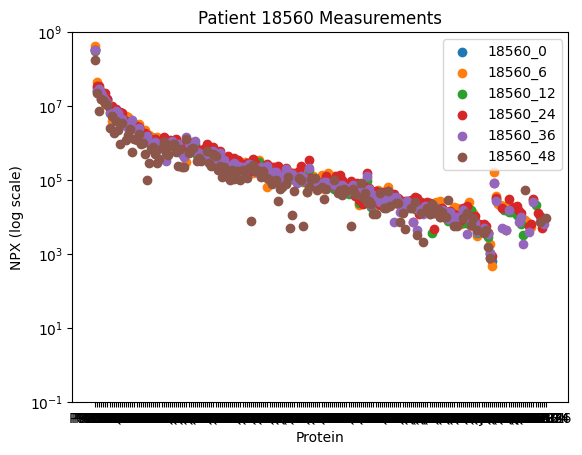

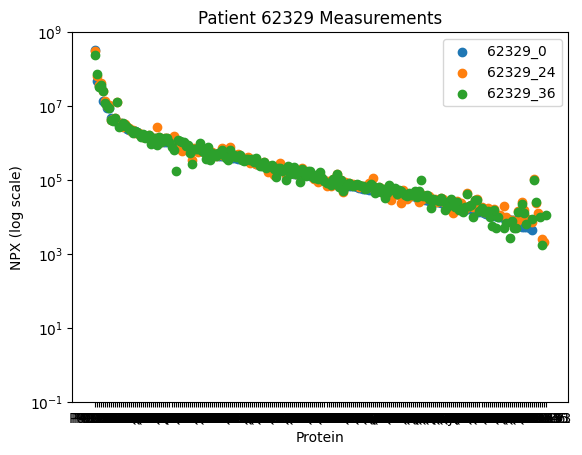

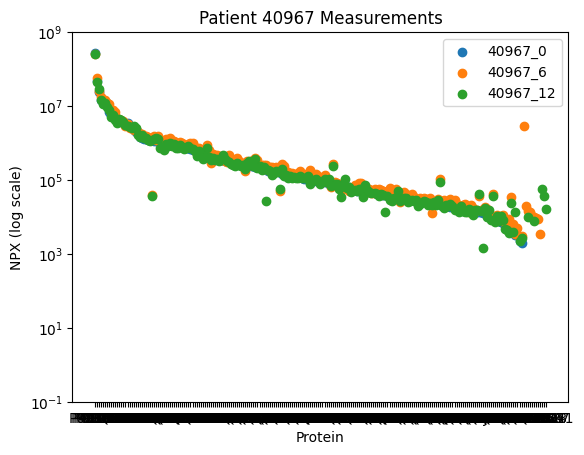

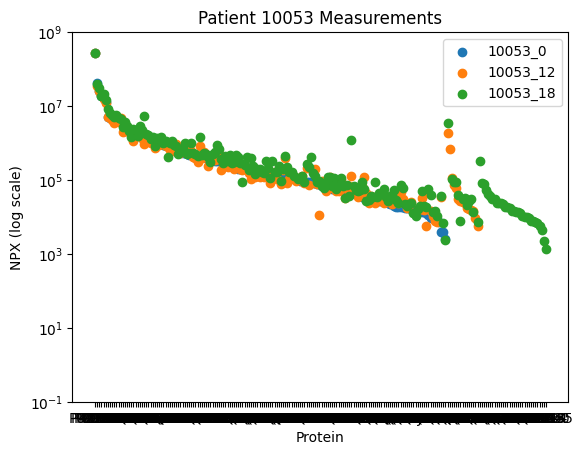

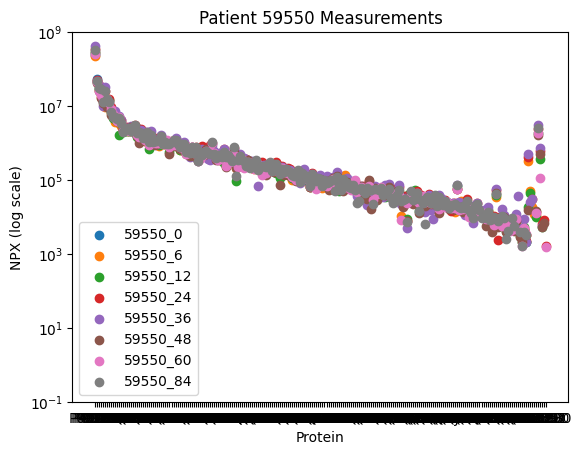

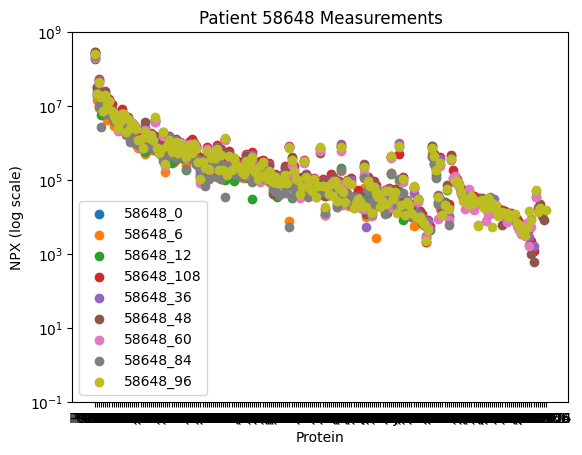

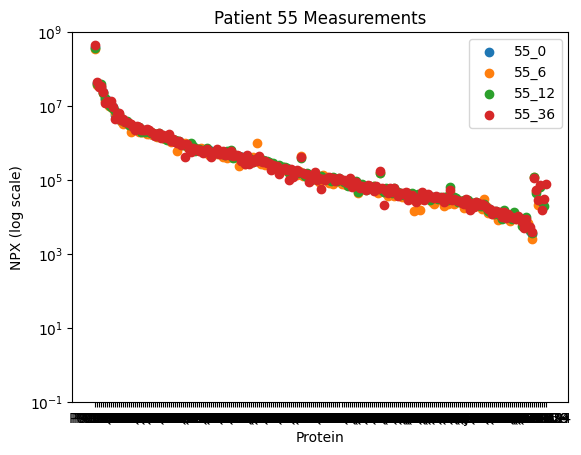

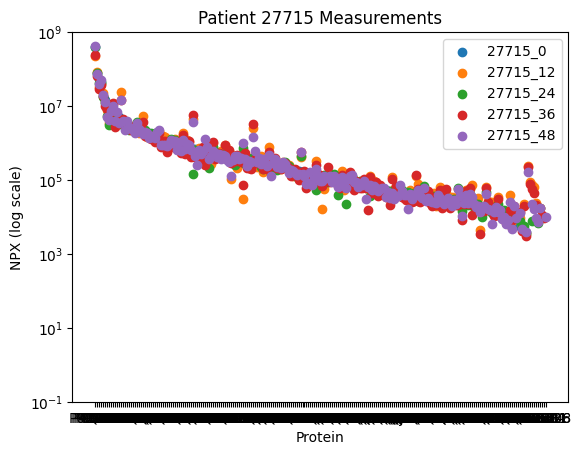

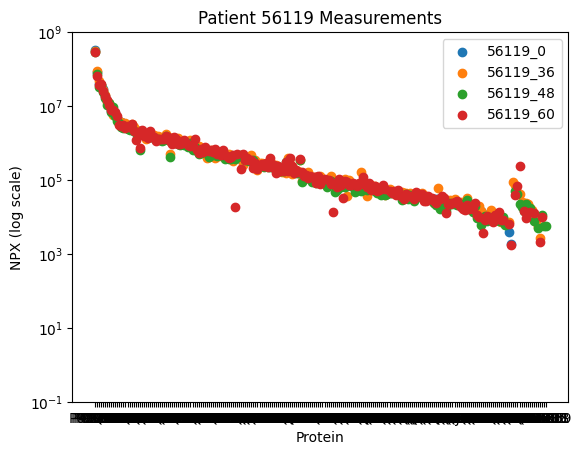

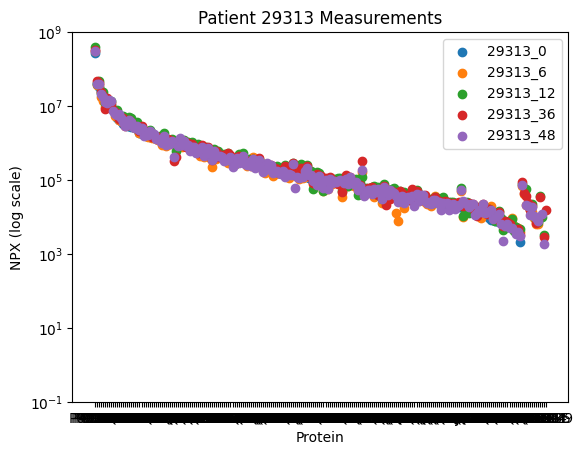

In [73]:
import random

# assuming patients is a dictionary or a set of Patient objects
# create a list of 10 randomly selected patients
random_patients = random.sample(list(patients.values()), 10)

# plot the measurements for each of the 10 random patients
for patient in random_patients:
    plot_patient_measurements(patient)


In [63]:
## estimate UPDRS from Protein measurements


prot_df

,visit_id,visit_month,patient_id,UniProt,NPX
typing.Literal[<no_default>],,,,,
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
